# In-Depth Guide to Autoregressive Convolutional Neural Networks (CNNs) with 1D and 2D Convolutions

## Table of Contents
1. [Introduction](#introduction)
2. [Autoregressive Models](#autoregressive-models)
3. [Convolutional Neural Networks (CNNs)](#convolutional-neural-networks)
4. [1D vs 2D Convolutions](#1d-vs-2d-convolutions)
5. [Autoregressive CNNs with 1D Convolutions](#autoregressive-cnn-with-1d-convolutions)
6. [Multi-Dimensional Convolutions](#multi-dimensional-convolutions)

---

## Introduction

In the evolving landscape of machine learning, Autoregressive Convolutional Neural Networks (CNNs) have gained prominence for their efficacy in time series analysis. By leveraging the strengths of autoregressive models and convolutional layers, these networks offer a robust framework for capturing both spatial and temporal dependencies in data.

---

## Autoregressive Models

An autoregressive model is fundamentally designed to use past observations for predicting future points in a time series. The term "autoregressive" signifies that the model's predictions are a function of its own previous outputs. These models are particularly useful for capturing long-term dependencies in time series data.

---

## Convolutional Neural Networks (CNNs)

Originally developed for tasks like image and video recognition, CNNs have found applications far beyond. Their ability to identify local and hierarchical features makes them highly adaptable, including for time series analysis.

---

## 1D vs 2D Convolutions in Time Series Analysis

### Why 1D Convolutions for Time Series?

#### Fundamentals

In time series data, each data point typically represents a value at a specific point in time. The data is inherently sequential, meaning that the order of the data points is crucial for understanding the underlying patterns. This sequential nature makes the data one-dimensional in its simplest form.

#### Examples

Consider a dataset that records the hourly temperature of a city. The data might look something like `[23, 24, 22, 21, ...]`, where each number represents the temperature at a specific hour. The goal might be to predict future temperatures based on past data. In this case, a 1D convolution can slide across this one-dimensional array to capture the temporal relationships between consecutive hours.

#### Why Not 2D?

While it might be tempting to think that multiple features make the data two-dimensional, these features often don't have a "spatial" relationship that 2D convolutions are designed to capture. For example, if the temperature data also included humidity levels, the dataset might have a shape like `(N, 2)`. However, the relationship between temperature and humidity is not spatial in the way that pixel relationships in an image are spatial.

---

### Could 2D Convolutions Be Used?

#### Fundamentals

Technically, 2D convolutions could be applied to time series data, especially when the dataset includes multiple features. In image processing, 2D convolutions are powerful because they capture the spatial relationships between pixels in both vertical and horizontal directions.

#### Examples

In an image of a cat, the spatial relationship between a pixel representing the tip of the ear and another representing the base of the ear is crucial for recognizing that the image contains a cat's ear. This is where 2D convolutions excel.

#### Why Not Recommended for Time Series?

In time series data with multiple features (e.g., temperature and humidity), these features don't usually have a spatial relationship. Applying a 2D convolution would imply that there is a meaningful relationship between feature 1 at time `t` and feature 2 at time `t`, in a manner similar to the spatial relationship between adjacent pixels in an image. This is generally not the case in time series data, making 1D convolutions more naturally suited for such tasks.

---

## Autoregressive CNNs with 1D Convolutions

In this architecture, 1D convolutional layers are integrated to process the input sequence and produce a feature map. This feature map is then utilized to make future predictions in the time series. The model is trained in such a way that it learns to use these feature maps effectively, thereby capturing both spatial and temporal features.

---

## Multi-Dimensional Convolutions

### 2D Convolutions

Primarily used in image processing, 2D convolutions involve sliding a 2D kernel over the 2D input data. This results in a 2D feature map that captures spatial relationships.

### 3D Convolutions

For video or volumetric data, 3D convolutions are used. Here, a 3D kernel is applied to the 3D input data, generating a 3D feature map that captures both spatial and temporal relationships.

---

## The Feasibility of Using 2D Convolutions on Time Series Data

### When Can 2D Convolutions Be Used?

#### Data Volume

Having a large volume of data can make it feasible to experiment with 2D convolutions. With more data, the model has a better chance of capturing complex relationships between features across different time steps.

#### Feature Relationships

If the features in the dataset are not just temporal but also have some form of inter-feature relationships that are worth capturing, 2D convolutions can be considered. For example, if you're analyzing energy consumption and have features like temperature, humidity, and wind speed, these features might interact in a way that could be captured by a 2D convolution.

### How to Implement 2D Convolutions?

#### Reshaping Data

The first step is to reshape the data to fit into a 2D convolutional layer. If your original time series data has a shape of `(N, T)`, where `N` is the number of samples and `T` is the number of time steps, and you have `F` features, your data needs to be reshaped to `(N, T, F)`.

#### Convolutional Layer

The next step is to apply 2D convolutions. Unlike 1D convolutions where the kernel slides across the time axis, in 2D convolutions, the kernel will slide both across the time axis and the feature axis.

### Advantages and Disadvantages

#### Advantages

- Ability to capture complex inter-feature relationships.
- Potentially higher representational power due to the added complexity of the model.

#### Disadvantages

- Increased computational cost.
- Risk of overfitting, especially if the dataset is not large enough or if the relationships between features are not strong enough to justify the added complexity.




Example Dataset
Suppose you have a dataset with N=3 features (Temperature, Humidity, Wind Speed) and T=5 time steps. Your dataset might look something like this when flattened:

In [1]:
# Sample dataset with N=3 features and T=5 time steps
data = [
    [20, 60, 5],  # Time step 1
    [21, 62, 4],  # Time step 2
    [22, 63, 5],  # Time step 3
    [21, 61, 6],  # Time step 4
    [20, 60, 5]   # Time step 5
]

print("Shaped data:")
print(data)

Shaped data:
[[20, 60, 5], [21, 62, 4], [22, 63, 5], [21, 61, 6], [20, 60, 5]]


Reshaping the Data
To prepare this data for 2D convolution, you would reshape it into a 3D array of shape (T, N, 1), where the last dimension is the channel dimension (common in image data but just set to 1 here).

Here's how you could reshape this data using Python's NumPy library:

In [2]:
import numpy as np

# Original data
data = np.array([
    [20, 60, 5],
    [21, 62, 4],
    [22, 63, 5],
    [21, 61, 6],
    [20, 60, 5]
])

# Reshape data for 2D convolution
reshaped_data = data.reshape((5, 3, 1))

print("Reshaped data:")
print(reshaped_data)

Reshaped data:
[[[20]
  [60]
  [ 5]]

 [[21]
  [62]
  [ 4]]

 [[22]
  [63]
  [ 5]]

 [[21]
  [61]
  [ 6]]

 [[20]
  [60]
  [ 5]]]


In [3]:
reshaped_data.shape

(5, 3, 1)

Explanation

- The first dimension (5) represents the time steps.
- The second dimension (3) represents the features (Temperature, Humidity, Wind Speed).
- The third dimension (1) is the channel dimension, which is commonly used in image data but is set to 1 here since we have only one "channel" of data.

By reshaping the data this way, you're preparing it for a 2D convolutional layer that will slide a 2D kernel across both the time steps and the features, potentially capturing complex inter-feature relationships.

In [4]:
#Importing the necessary libraries
import math
import numpy as np
import pandas as pd
import datetime as dt
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
import statsmodels.api as sm
import warnings
import matplotlib.dates as mdates
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from sklearn.feature_selection import VarianceThreshold
import geopandas as gpd
from shapely import wkt

# Import necessary libraries
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
# FE / ML Libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from category_encoders import OneHotEncoder, OrdinalEncoder, TargetEncoder, BinaryEncoder, CatBoostEncoder, HelmertEncoder, SumEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif, f_regression, mutual_info_classif, mutual_info_regression
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.feature_selection import RFE

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, ElasticNet

In [7]:
import tensorflow as tf
# Import necessary libraries
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers

2023-09-24 21:10:54.957053: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-24 21:10:54.984540: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
cwd = os.getcwd()
DATA_PATH = os.path.join(cwd, '..', 'data')
RAW_DATA_PATH = os.path.join(DATA_PATH, 'raw')
PROCESSED_DATA_PATH = os.path.join(DATA_PATH, 'processed')

In [9]:
def load_dataframes_from_csv(suffix='_6', directory='../data/interim/train'):
    # Read the csv files and convert them to dataframes
    X_train = pd.read_csv(os.path.join(directory, f'x_train{suffix}.csv'))
    y_train = pd.read_csv(os.path.join(directory, f'y_train{suffix}.csv'))
    X_val = pd.read_csv(os.path.join(directory, f'x_val{suffix}.csv'))
    y_val = pd.read_csv(os.path.join(directory, f'y_val{suffix}.csv'))
    X_test = pd.read_csv(os.path.join(directory, f'x_test{suffix}.csv'))
    y_test = pd.read_csv(os.path.join(directory, f'y_test{suffix}.csv'))

    return X_train, y_train, X_val, y_val, X_test, y_test

# Call the function
X_train, y_train, X_val, y_val, X_test, y_test = load_dataframes_from_csv()


In [10]:
X_train.columns

Index(['hotel_station_avg_distance_median_t_1',
       'university_station_count_median_t_1', 'temp_std_t_2',
       'windspeed_std_t_2', 'parking_station_avg_distance_std_t_2',
       'trainstation_station_avg_distance_median_t_2',
       'hotel_station_avg_distance_std_t_2',
       'cinema_station_avg_distance_median_t_2', 'Total kWh_max_t_2',
       'windspeed_median_t_3', 'university_station_count_median_t_3',
       'parking_station_avg_distance_std_t_4',
       'university_station_avg_distance_median_t_4', 'Total kWh_t_4',
       'busstation_station_count_t_4', 'charging_time_t_4'],
      dtype='object')

In [11]:
# Check for NaNs
if X_train.isnull().values.any() or X_val.isnull().values.any() or X_test.isnull().values.any():
    print("Data contains NaN values. Please clean the data.")

# Check shapes
print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Validation shape: {X_val.shape}, {y_val.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")


Train shape: (44762, 16), (44762, 1)
Validation shape: (9592, 16), (9592, 1)
Test shape: (9591, 16), (9591, 1)


## Understanding the Data Shape for 1D CNNs

The dimensions of the dataset are often a source of confusion when working with 1D Convolutional Neural Networks (CNNs). In the given dataset, the following dimensions are observed:

- **Training set**: `(44762, 16)`
- **Validation set**: `(9592, 16)`
- **Test set**: `(9591, 16)`

### Reshaping for 1D CNNs

The data is reshaped to fit the requirements of 1D CNNs in Keras. The reshaped dimensions are:

- **Training set**: `(44762, 16, 1)`
- **Validation set**: `(9592, 16, 1)`
- **Test set**: `(9591, 16, 1)`

### Interpretation of Dimensions

1. **Batch Size**: The first dimension represents the number of samples in each set. For instance, 44762 samples are included in the training set.
  
2. **Length of Sequence**: The second dimension, often referred to as the "length" of the sequence for each sample, is 16. This corresponds to the number of features in the dataset.

3. **Number of Channels**: The last dimension, added by using `np.expand_dims`, is 1. This indicates that there is only one channel.

It should be noted that the term "time_steps" might be misleading in this context. The second dimension is not indicative of the number of time steps in the traditional sense, as one might find in time series analysis or Recurrent Neural Networks (RNNs).

In summary, the reshaped dimensions are found to be appropriate for the application of 1D CNNs in Keras.

Reshaped X_train shape: (44762, 16, 1)
Reshaped X_val shape: (9592, 16, 1)
Reshaped X_test shape: (9591, 16, 1)


Epoch 1/100
700/700 [==============================] - 2s 3ms/step - loss: 76.2862 - mae: 6.5127 - val_loss: 60.5667 - val_mae: 6.1651
Epoch 2/100
700/700 [==============================] - 2s 3ms/step - loss: 58.1627 - mae: 6.0530 - val_loss: 62.7963 - val_mae: 6.2882
Epoch 3/100
700/700 [==============================] - 2s 2ms/step - loss: 56.0386 - mae: 6.0077 - val_loss: 57.4515 - val_mae: 5.9821
Epoch 4/100
700/700 [==============================] - 2s 3ms/step - loss: 55.1583 - mae: 5.9814 - val_loss: 55.6007 - val_mae: 5.8713
Epoch 5/100
700/700 [==============================] - 2s 3ms/step - loss: 54.7060 - mae: 5.9689 - val_loss: 53.0057 - val_mae: 5.7189
Epoch 6/100
700/700 [==============================] - 2s 3ms/step - loss: 54.4487 - mae: 5.9606 - val_loss: 52.9356 - val_mae: 5.7133
Epoch 7/100
700/700 [==============================] - 2s 3ms/step - loss: 54.3316 - mae: 5.9568 - val_loss: 52.0322 - val_mae: 5.6687
Epoch 8/100
700/700 [==============================] - 

/opt/conda/envs/ev_charging_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/conda/envs/ev_charging_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_6576/270945938.py", line 136, in <module>
    build_train_1D_CNN(X_train, y_train, X_val, y_val, X_test, y_test)
  File "/tmp/ipykernel_6576/270945938.py", line 82, in build_train_1D_CNN
    np.min([y_test.min(), y_test_predictions.min()]),
  File "<__array_function__ internals>", line 180, in amin
  File "/opt/conda/envs/ev_charging_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py", line 2918, in amin
    return _wrapreduction(a, np.minimum, 'min', axis, None, out,
  File "/opt/conda/envs/ev_charging_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py", line 86, in _wrapreduction
    return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
  File "/opt/conda/envs/ev_charging_env/lib/python3.10/site-packages/pandas/core/generic.py", l

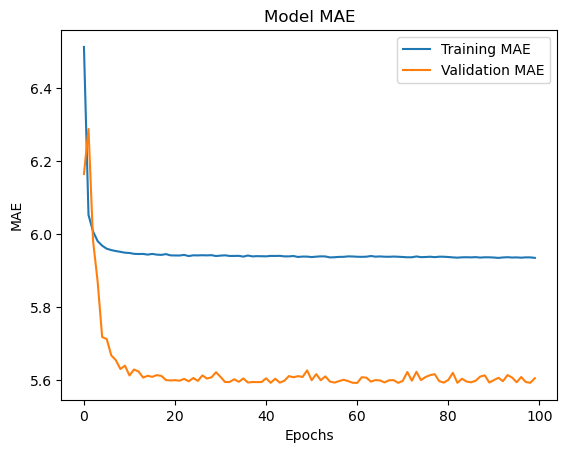

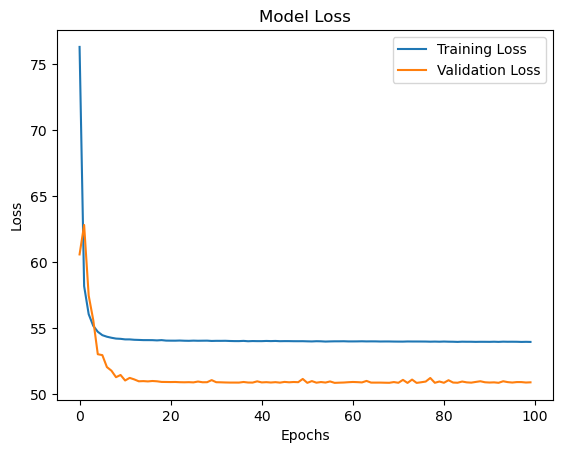

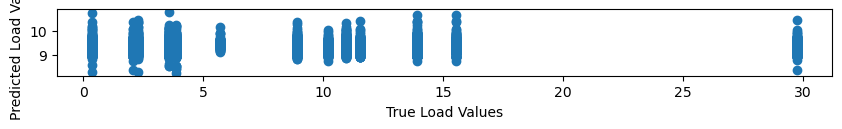

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers

def build_train_1D_CNN(X_train, y_train, X_val, y_val, X_test, y_test):
    """
    Build, compile, and train a 1D CNN model based on the dataset.
    Then, plot the learning curves and visualize the model's predictions.
    """
    
    # Reshape the data to fit into a 1D CNN layer
    # The shape should be (batch_size, time_steps, num_features)
    X_train = np.expand_dims(X_train, axis=-1)
    X_val = np.expand_dims(X_val, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)

    # Print the shapes of the reshaped datasets
    print(f"Reshaped X_train shape: {X_train.shape}")
    print(f"Reshaped X_val shape: {X_val.shape}")
    print(f"Reshaped X_test shape: {X_test.shape}")
    
    # Build the 1D CNN model
    model = models.Sequential([
        # Conv1D layer: 64 filters, kernel size of 3
        # filters=64: Number of output filters in the convolution
        # kernel_size=3: Length of the 1D convolution window
        layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        
        # MaxPooling layer: pool size of 2
        # pool_size=2: Factor by which to downscale, so it takes the maximum value over a window of size 2
        layers.MaxPooling1D(pool_size=2),
        
        # Flatten layer: Flattens the input, does not affect the batch size
        layers.Flatten(),
        
        # Dense layer: 50 units with ReLU activation
        layers.Dense(50, activation='relu'),
        
        # Output layer: 1 unit for regression output
        layers.Dense(1)
    ])
    
    # Compile the model
    model.compile(
        # Adam optimizer with learning rate of 0.0001
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        
        # Mean Squared Error loss for regression problems
        loss='mse',
        
        # Accuracy for monitoring the training
        metrics=["mae"]
    )
    
    # Train the model
    # epochs=50: Number of times the learning algorithm will work through the entire training dataset
    # batch_size=64: Number of samples per gradient update
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=64,
        validation_data=(X_val, y_val)
    )
    
    model.summary()

    # Plotting learning curves
    plot_learning_curve(history)
    
    # Making predictions
    y_test_predictions = pd.Series(model.predict(X_test).flatten(), index=y_test.index)
    
    # Visualization of the accuracy
    fig, a = plt.subplots(figsize=(10, 10))
    a.set_aspect('equal', 'box')
    plt.scatter(y_test, y_test_predictions)
    plt.xlabel('True Load Values')
    plt.ylabel('Predicted Load Values')
    lims = [
        np.min([y_test.min(), y_test_predictions.min()]), 
        np.max([y_test.max(), y_test_predictions.max()])
    ]
    plt.xlim(lims), plt.ylim(lims)
    plt.plot(lims, lims)
    plt.show()

    plot_predictions(y_test, y_test_predictions)

def plot_learning_curve(history):
    """
    Plot the learning curves for training and validation metrics.
    """
    # Plotting MAE
    plt.figure()
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Model MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    
    # Plotting Loss
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

def plot_predictions(y_test, Y_test_predictions):
    """
    Plot the actual and predicted values.
    """
    # Plotting the Figure
    plt.figure()
    plt.plot(y_test, 'k.-', label='Actual')
    plt.plot(Y_test_predictions, 'x', alpha=0.7, label='Predicted 1 hr ahead')
    
    # Adding labels and title
    plt.ylabel('Load')
    plt.xlabel('Time Index')
    plt.title('1D CNN')
    
    # Adding legend
    plt.legend()
    
    # Setting figure size
    mpl.rcParams['figure.figsize'] = [12.0, 6.0]
    
    # Show the plot
    plt.show()

build_train_1D_CNN(X_train, y_train, X_val, y_val, X_test, y_test)


## Architecture Explanation

### Layer-by-Layer Explanation

#### Conv1D Layer

- **Output Shape**: `(None, 14, 64)`
- **Parameters**: 256

In this layer, a 1D convolution operation is performed. A total of 64 filters are used, each with a kernel size of 3. The output shape indicates that the time dimension has been reduced to 14, and 64 feature maps have been generated. 

#### MaxPooling1D Layer

- **Output Shape**: `(None, 7, 64)`
- **Parameters**: 0

Following the convolution layer, a max-pooling operation is conducted. The time dimension is halved, reducing it to 7, while the number of feature maps remains 64.

#### Flatten Layer

- **Output Shape**: `(None, 448)`
- **Parameters**: 0

The feature maps are flattened into a single vector of size 448, making it suitable for input into the dense layers.

#### Dense Layer

- **Output Shape**: `(None, 50)`
- **Parameters**: 22,450

A fully connected layer is added with 50 neurons and a ReLU activation function. 

#### Output Dense Layer

- **Output Shape**: `(None, 1)`
- **Parameters**: 51

The final layer is a dense layer with a single neuron, suitable for regression tasks.

### Summary

The model has a total of 22,757 trainable parameters.
